<a href="https://colab.research.google.com/github/VEVELANDIA/Prueba-DataScientist-VictorVelandia/blob/main/Victor_Velandia_Prueba_Especialista_Anal%C3%ADtica_Bancaseguros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
#@title Importamos las librerías necesarias
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
#@title Subimos los archivos
uploaded = files.upload()

Saving Tabla_Clientes.xlsx to Tabla_Clientes (2).xlsx
Saving Tabla_Creditos.xlsx to Tabla_Creditos (2).xlsx
Saving Tabla_Gestion_Canales.xlsx to Tabla_Gestion_Canales (2).xlsx
Saving Tabla_Oficinas.xlsx to Tabla_Oficinas (2).xlsx
Saving Tabla_Pasivo.xlsx to Tabla_Pasivo (2).xlsx
Saving Tabla_Siniestros.xlsx to Tabla_Siniestros (2).xlsx


In [130]:
#@title 1. Cargar las bases de datos
df_clientes = pd.read_excel('Tabla_Clientes.xlsx')
df_creditos = pd.read_excel('Tabla_Creditos.xlsx')
df_gestion_canales = pd.read_excel('Tabla_Gestion_Canales.xlsx')
df_oficinas = pd.read_excel('Tabla_Oficinas.xlsx')
df_pasivo = pd.read_excel('Tabla_Pasivo.xlsx')
df_siniestros = pd.read_excel('Tabla_Siniestros.xlsx')

In [131]:
#@title 2. Realice una consulta en SQL cruzando tablas que le permita responder las preguntas: ¿Cuántos clientes tienen crédito?
clientes_con_credito = df_creditos['Id_Cliente'].nunique()
print(f"Clientes con crédito: {clientes_con_credito}")

Clientes con crédito: 2790


In [132]:
#@title ¿Cuántos clientes cuentan con productos del pasivo?
clientes_con_pasivo = df_pasivo['Id_Cliente'].nunique()
print(f"Clientes con productos del pasivo: {clientes_con_pasivo}")

Clientes con productos del pasivo: 1827


In [133]:
# ¿Cuántos clientes se han siniestrado?
clientes_siniestrados = df_siniestros[df_siniestros['siniestro'] == 'Si']['Id_Cliente'].nunique()
print(f"Clientes con siniestros: {clientes_siniestrados}")

Clientes con siniestros: 387


In [134]:
# ¿Cuántos son posibles fraudes?
posibles_fraudes = df_siniestros[df_siniestros['posible_fraude'] == 'Si']['Id_Cliente'].nunique()
print(f"Posibles fraudes: {posibles_fraudes}")

Posibles fraudes: 186


In [135]:
#@title 3. Usando el campo “Max_Dias_Mora” de la tabla Créditos, genere un rango en un campo Nuevo o en una tabla temporal (Insertar Columna en la tabla Créditos)
# Se definen los límites de los rangos y las etiquetas correspondientes
bins = [-1, 0, 30, 60, 90, float('inf')] # El límite superior de float('inf') capturará cualquier valor que sea mayor a 90
labels = ['Al día', '1 a 30', '31 a 60', '61 a 90', 'Mayor a 90']

# Crea la nueva columna 'Rango_Dias_Mora' basada en los rangos definidos
df_creditos['Rango_Dias_Mora'] = pd.cut(df_creditos['Max_dias_mora'], bins=bins, labels=labels)
df_creditos

,Id_Cliente,monto_credito,tasa,saldo_credito,Cuota_credito,Max_dias_mora,Rango_Dias_Mora
0,1,48000000,20.18,43595150,1019317,0,Al día
1,2,40698400,18.20,26347670,684443,0,Al día
2,3,7000000,18.20,6610460,145569,0,Al día
3,4,12000000,18.73,11332910,1249130,0,Al día
4,5,13000000,20.18,12186200,280938,0,Al día
...,...,...,...,...,...,...,...
2785,2786,48000000,20.18,43595150,943783,0,Al día
2786,2787,12000000,18.73,11332910,286909,0,Al día
2787,2788,13000000,20.18,12186200,266973,0,Al día
2788,2789,12000000,18.73,11332910,253910,0,Al día


In [136]:
#@title 4. De acuerdo con el punto anterior, realice una consulta para identificar la cantidad de clientes y saldo(Saldo_Credito) por rango de mora.
# Para conocer los datos por rango de mora realizo un agrupamiento en función del 'Rango_Dias_Mora' y luego aplico con el método agg() para realizar el conteo y suma de las variables utillizadas.
tabla_mora = df_creditos.groupby('Rango_Dias_Mora').agg(Cantidad_Clientes=('Id_Cliente', 'count'),
                                                         Saldo_Credito=('saldo_credito', 'sum')).reset_index()

tabla_mora.columns = ['Rango_Dias_En_Mora', 'Cantidad_Clientes', 'Saldo_Credito']
tabla_mora

,Rango_Dias_En_Mora,Cantidad_Clientes,Saldo_Credito
0,Al día,2363,38411982010
1,1 a 30,298,3618998920
2,31 a 60,71,599188110
3,61 a 90,55,480329920
4,Mayor a 90,3,24661500


In [137]:
#@title 5. Cruce todas las bases conformando una única base de datos usando el código del cliente y cod_oficina según corresponda.
# Primero, cruzo las bases que tienen 'Id_Cliente' en común mediante Outer Join para conservar todos los registros existentes en cada base
Base_full = pd.merge(df_clientes, df_creditos, on='Id_Cliente', how='outer')
Base_full = pd.merge(Base_full, df_gestion_canales, on='Id_Cliente', how='outer')
Base_full = pd.merge(Base_full, df_pasivo, on='Id_Cliente', how='outer')
Base_full = pd.merge(Base_full, df_siniestros, on='Id_Cliente', how='outer')

# Luego, cruzo la base resultante con la de oficinas usando 'Cod_oficina'
Base_full = pd.merge(Base_full, df_oficinas, on='Cod_oficina', how='outer')
Base_full

,Id_Cliente,Ciudad_x,Patrimonio,Ingresos_Mensuales,No_hijos,Edad,Cod_oficina,fecha_Ingreso_Banco,monto_credito,tasa,...,Canal_Gestiono,saldo_Ahorro,siniestro,estado siniestro,valor_por_pagar,posible_fraude,Ciudad_y,Nombre_Oficina,Lat,Lon
0,1,Bogotá,165890000,3944853,2.0,35.0,4025,2022-02-05,48000000,20.18,...,Red,3760330.0,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823
1,2,Bogotá,420786980,4637910,1.0,41.0,4025,2017-08-26,40698400,18.20,...,Call_venta,NaN,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823
2,16,Bogotá,496870000,20638994,0.0,26.0,4025,2018-10-31,30931200,18.20,...,Call_venta,4446120.0,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823
3,25,Bogotá,665050000,12457092,2.0,44.0,4025,2019-03-07,10465600,18.07,...,Red,NaN,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823
4,51,Bogotá,165820000,21643300,1.0,25.0,4025,2017-06-24,15000000,18.73,...,Market_contact,NaN,Si,Objetado,0.0,Si,Bogotá,Calle 100,4.680285,-74.038823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,2747,Barranquilla,104760000,7443378,2.0,27.0,7025,2020-11-24,22000000,19.60,...,Call_venta,NaN,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434
2786,2748,Barranquilla,65950000,18455565,1.0,22.0,7025,2018-09-08,52000000,19.60,...,Market_contact,NaN,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434
2787,2749,Barranquilla,490830000,6655147,2.0,36.0,7025,2018-04-12,16855600,18.20,...,Red,NaN,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434
2788,2766,Barranquilla,448510000,11998512,1.0,41.0,7025,2018-02-13,15000000,18.20,...,Red,1724940.0,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434


In [138]:
Base_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2790 entries, 0 to 2789
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id_Cliente           2790 non-null   int64         
 1   Ciudad_x             2703 non-null   object        
 2   Patrimonio           2790 non-null   int64         
 3   Ingresos_Mensuales   2790 non-null   int64         
 4   No_hijos             2647 non-null   float64       
 5   Edad                 2731 non-null   float64       
 6   Cod_oficina          2790 non-null   int64         
 7   fecha_Ingreso_Banco  2790 non-null   datetime64[ns]
 8   monto_credito        2790 non-null   int64         
 9   tasa                 2790 non-null   float64       
 10  saldo_credito        2790 non-null   int64         
 11  Cuota_credito        2790 non-null   int64         
 12  Max_dias_mora        2790 non-null   int64         
 13  Rango_Dias_Mora      2790 non-nul

In [139]:
#@title 6. Cree un campo llamado “antiguedad_cliente” usando la “fecha_ingreso_Banco”

# Cálculo de la antigüedad en días
Base_full['antiguedad_cliente'] = (pd.Timestamp('today') - Base_full['fecha_Ingreso_Banco']).dt.days
Base_full

,Id_Cliente,Ciudad_x,Patrimonio,Ingresos_Mensuales,No_hijos,Edad,Cod_oficina,fecha_Ingreso_Banco,monto_credito,tasa,...,saldo_Ahorro,siniestro,estado siniestro,valor_por_pagar,posible_fraude,Ciudad_y,Nombre_Oficina,Lat,Lon,antiguedad_cliente
0,1,Bogotá,165890000,3944853,2.0,35.0,4025,2022-02-05,48000000,20.18,...,3760330.0,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,531
1,2,Bogotá,420786980,4637910,1.0,41.0,4025,2017-08-26,40698400,18.20,...,NaN,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,2155
2,16,Bogotá,496870000,20638994,0.0,26.0,4025,2018-10-31,30931200,18.20,...,4446120.0,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,1724
3,25,Bogotá,665050000,12457092,2.0,44.0,4025,2019-03-07,10465600,18.07,...,NaN,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,1597
4,51,Bogotá,165820000,21643300,1.0,25.0,4025,2017-06-24,15000000,18.73,...,NaN,Si,Objetado,0.0,Si,Bogotá,Calle 100,4.680285,-74.038823,2218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,2747,Barranquilla,104760000,7443378,2.0,27.0,7025,2020-11-24,22000000,19.60,...,NaN,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,969
2786,2748,Barranquilla,65950000,18455565,1.0,22.0,7025,2018-09-08,52000000,19.60,...,NaN,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,1777
2787,2749,Barranquilla,490830000,6655147,2.0,36.0,7025,2018-04-12,16855600,18.20,...,NaN,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,1926
2788,2766,Barranquilla,448510000,11998512,1.0,41.0,7025,2018-02-13,15000000,18.20,...,1724940.0,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,1984


In [140]:
#@title 7. Cree un campo llamado “Profundizacion_Cliente” que contenga la información de si el cliente es “Exclusivo de crédito” o es “Mixto” (tiene crédito y pasivo)
#Se crea la columna 'Profundizacion_Cliente' aplicando una función lambda a cada fila del DataFrame, para revisar si el dato de la columna 'saldo_Ahorro' no es nulo(significa que el cliente tiene un producto del pasivo) y si la columna 'monto_credito' es mayor a 0 (el cliente tiene un crédito). Si ambas condiciones se cumplen, entonces el cliente es 'Mixto'. De lo contrario, es clasificado como 'Exclusivo de crédito'.
Base_full['Profundizacion_Cliente'] = Base_full.apply(lambda row: 'Mixto' if pd.notnull(row['saldo_Ahorro']) and row['monto_credito'] > 0 else 'Exclusivo de crédito', axis=1)
Base_full

,Id_Cliente,Ciudad_x,Patrimonio,Ingresos_Mensuales,No_hijos,Edad,Cod_oficina,fecha_Ingreso_Banco,monto_credito,tasa,...,siniestro,estado siniestro,valor_por_pagar,posible_fraude,Ciudad_y,Nombre_Oficina,Lat,Lon,antiguedad_cliente,Profundizacion_Cliente
0,1,Bogotá,165890000,3944853,2.0,35.0,4025,2022-02-05,48000000,20.18,...,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,531,Mixto
1,2,Bogotá,420786980,4637910,1.0,41.0,4025,2017-08-26,40698400,18.20,...,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,2155,Exclusivo de crédito
2,16,Bogotá,496870000,20638994,0.0,26.0,4025,2018-10-31,30931200,18.20,...,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,1724,Mixto
3,25,Bogotá,665050000,12457092,2.0,44.0,4025,2019-03-07,10465600,18.07,...,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,1597,Exclusivo de crédito
4,51,Bogotá,165820000,21643300,1.0,25.0,4025,2017-06-24,15000000,18.73,...,Si,Objetado,0.0,Si,Bogotá,Calle 100,4.680285,-74.038823,2218,Exclusivo de crédito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,2747,Barranquilla,104760000,7443378,2.0,27.0,7025,2020-11-24,22000000,19.60,...,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,969,Exclusivo de crédito
2786,2748,Barranquilla,65950000,18455565,1.0,22.0,7025,2018-09-08,52000000,19.60,...,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,1777,Exclusivo de crédito
2787,2749,Barranquilla,490830000,6655147,2.0,36.0,7025,2018-04-12,16855600,18.20,...,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,1926,Exclusivo de crédito
2788,2766,Barranquilla,448510000,11998512,1.0,41.0,7025,2018-02-13,15000000,18.20,...,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,1984,Mixto


In [141]:
#@title Haga un análisis estadístico descriptivo de los datos para identificar nulos, distribuciones, valores mínimos, máximos, promedio.
#Calculo de las estadísticas descriptivas de las variables numericas
Variables_numericas = Base_full[['Patrimonio','Ingresos_Mensuales','No_hijos','Edad','monto_credito','tasa','saldo_credito','Cuota_credito','Max_dias_mora','saldo_Ahorro','valor_por_pagar','antiguedad_cliente']].describe(include=[np.number])
Variables_numericas

,Patrimonio,Ingresos_Mensuales,No_hijos,Edad,monto_credito,tasa,saldo_credito,Cuota_credito,Max_dias_mora,saldo_Ahorro,valor_por_pagar,antiguedad_cliente
count,2.790000e+03,2.790000e+03,2647.000000,2731.000000,2.790000e+03,2790.000000,2.790000e+03,2.790000e+03,2790.000000,1.827000e+03,387.000000,2790.000000
mean,4.839376e+08,1.217170e+07,0.987533,43.655071,2.200042e+07,19.552763,1.546063e+07,5.916801e+05,4.771326,2.166890e+06,27487.777778,1420.128674
std,2.800101e+08,5.443799e+06,0.835392,14.223582,1.650257e+07,1.918474,1.393254e+07,5.019337e+05,15.070054,1.453268e+06,46250.030177,530.170818
min,9.681700e+05,1.174908e+06,0.000000,20.000000,3.000000e+06,18.070000,4.500000e+04,1.178000e+03,0.000000,0.000000e+00,0.000000,473.000000
25%,2.412500e+08,8.692680e+06,0.000000,31.000000,1.046560e+07,18.200000,6.129460e+06,1.740348e+05,0.000000,1.205330e+06,0.000000,959.250000
50%,4.760300e+08,1.210641e+07,1.000000,42.000000,2.000000e+07,18.730000,1.095476e+07,4.042940e+05,0.000000,1.811180e+06,0.000000,1461.000000
75%,7.187400e+08,1.617026e+07,2.000000,56.000000,2.641440e+07,20.180000,2.012539e+07,1.087994e+06,0.000000,2.882530e+06,62148.000000,1863.000000
max,9.990100e+08,2.211562e+07,4.000000,69.000000,9.800000e+07,23.930000,8.840686e+07,2.385512e+06,96.000000,1.110074e+07,149570.000000,2379.000000


array([[<Axes: title={'center': 'Patrimonio'}>,
        <Axes: title={'center': 'Ingresos_Mensuales'}>,
        <Axes: title={'center': 'No_hijos'}>],
       [<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'monto_credito'}>,
        <Axes: title={'center': 'tasa'}>],
       [<Axes: title={'center': 'saldo_credito'}>,
        <Axes: title={'center': 'Cuota_credito'}>,
        <Axes: title={'center': 'Max_dias_mora'}>],
       [<Axes: title={'center': 'saldo_Ahorro'}>,
        <Axes: title={'center': 'valor_por_pagar'}>,
        <Axes: title={'center': 'antiguedad_cliente'}>]], dtype=object)

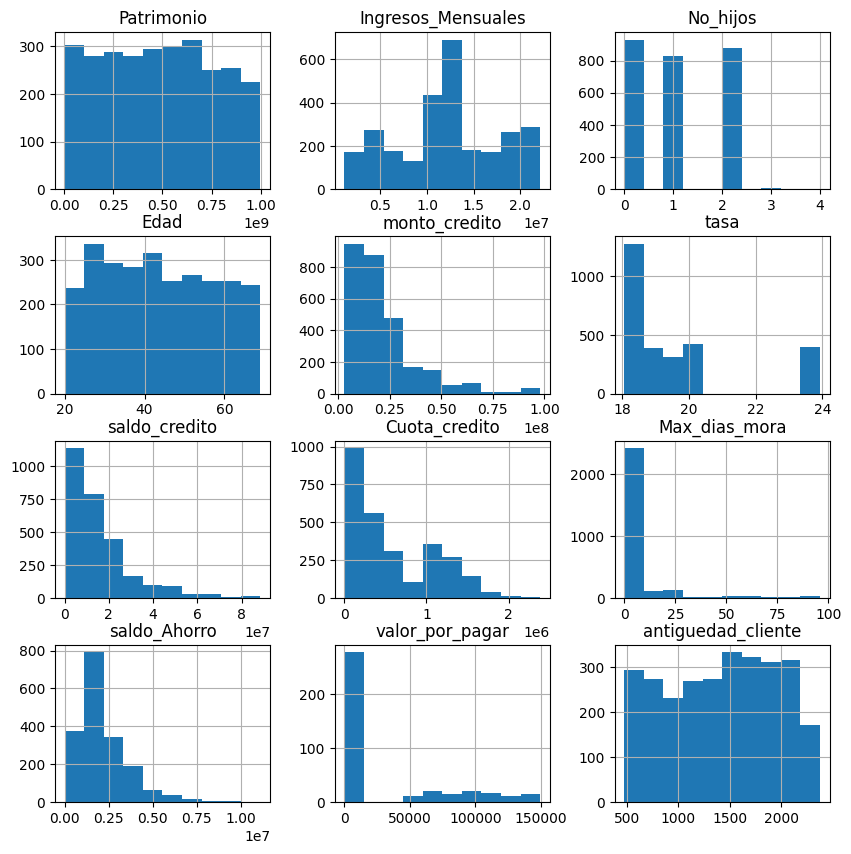

In [142]:
#@title Distribución de las variables numericas
Base_full[['Patrimonio','Ingresos_Mensuales','No_hijos','Edad','monto_credito','tasa','saldo_credito','Cuota_credito','Max_dias_mora','saldo_Ahorro','valor_por_pagar','antiguedad_cliente']].hist(figsize=(10, 10))

In [143]:
#@title Analisis descriptivo variables no categóricas
desc_var_categoricas = Base_full.describe(include=[np.object])
desc_var_categoricas

<ipython-input-143-0fa8094fcf62>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  desc_var_categoricas = Base_full.describe(include=[np.object])


,Ciudad_x,Canal_Gestiono,siniestro,estado siniestro,posible_fraude,Ciudad_y,Nombre_Oficina,Profundizacion_Cliente
count,2703,2790,2790,387,387,2790,2790,2790
unique,4,3,2,3,2,4,12,2
top,Cali,Red,No,Objetado,No,Cali,Valle de Lili,Mixto
freq,778,952,2403,277,201,796,323,1827


In [144]:
#@title Validación de datos nulos
Validación_nulos = Base_full.isnull().sum().to_frame('missing_values')
Validación_nulos

,missing_values
Id_Cliente,0
Ciudad_x,87
Patrimonio,0
Ingresos_Mensuales,0
No_hijos,143
Edad,59
Cod_oficina,0
fecha_Ingreso_Banco,0
monto_credito,0
tasa,0


In [145]:
Nulos_ciudad = Base_full[Base_full['Ciudad_x'].isnull()]
Nulos_ciudad

,Id_Cliente,Ciudad_x,Patrimonio,Ingresos_Mensuales,No_hijos,Edad,Cod_oficina,fecha_Ingreso_Banco,monto_credito,tasa,...,siniestro,estado siniestro,valor_por_pagar,posible_fraude,Ciudad_y,Nombre_Oficina,Lat,Lon,antiguedad_cliente,Profundizacion_Cliente
136,1529,NaN,113160000,9055119,2.0,38.0,4025,2017-10-27,15000000,20.18,...,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,2093,Exclusivo de crédito
170,1973,NaN,252090000,5545199,2.0,67.0,4025,2020-08-01,13000000,18.73,...,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,1084,Exclusivo de crédito
193,2232,NaN,151590000,10973124,1.0,57.0,4025,2017-12-17,4465600,20.18,...,No,NaN,NaN,NaN,Bogotá,Calle 100,4.680285,-74.038823,2042,Exclusivo de crédito
205,2370,NaN,201680000,13781628,1.0,54.0,4025,2017-08-29,4388000,20.18,...,Si,Pagado,149570.0,No,Bogotá,Calle 100,4.680285,-74.038823,2152,Exclusivo de crédito
272,264,NaN,465250000,7011553,0.0,25.0,4024,2017-10-14,20931200,18.20,...,Si,Objetado,0.0,No,Bogotá,Unicentro,4.699515,-74.042170,2106,Mixto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,1424,NaN,365470000,4354844,0.0,NaN,7025,2020-03-04,25718000,20.18,...,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,1234,Mixto
2737,1768,NaN,173200000,7199188,0.0,63.0,7025,2019-02-11,10641700,18.20,...,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,1621,Exclusivo de crédito
2750,2025,NaN,139280000,12097955,2.0,49.0,7025,2019-04-16,13000000,20.18,...,No,NaN,NaN,NaN,Barranquilla,Buenavista,11.013531,-74.827434,1557,Mixto
2759,2123,NaN,103820000,8021995,0.0,30.0,7025,2017-08-26,4000000,18.73,...,Si,Pagado,106723.0,Si,Barranquilla,Buenavista,11.013531,-74.827434,2155,Mixto


**¿Cómo afectan los valores nulos?¿Qué se puede hacer con ellos? Si lo requiere haga una limpieza de datos**

Se encontraron valores nulos en las columnas 'Ciudad_x', 'No_hijos', 'Edad', 'saldo_Ahorro', 'estado siniestro', 'valor_por_pagar' y 'posible_fraude'. Esto puede afectar en el momento de analizar las cifras e indicadores, por lo que según la información de cada variable, se determinó tratarlos de la siguiente manera:
- En el campo 'Ciudad_x' se rellenarán los valores con base en el campo 'Cod_oficina', dado que una oficina solo existe en una misma ciudad.
- En el campo 'saldo_Ahorro' reemplazar los nulos con 0, dado que es factible que un valor nulo corresponda a que el cliente no tiene saldo
- En el campo 'No_hijos'  reemplazar los nulos con 0, dado que el valor nulo puedo indicar que no tiene hijos
- En los campos 'estado siniestro' y 'posible_fraude' reemplazar los nulos con "No", dado que al estar vacíos indica que posiblemente no tienen siniestro y ni posible fraude.
- En el campo 'valor_por_pagar' reemplazar los nulos con 0
- En el campo 'Edad' reemplaza los valores con la mediana

In [146]:
# Para tratar los nulos de 'Ciudad_x' se crea un diccionario con los campos 'Cod_oficina' y 'Ciudad_x' excluyendo los nulos, y se mapea en la columna 'Ciudad_x' de la base
Dic_ciudad = Base_full[Base_full['Ciudad_x'].notna()].groupby('Cod_oficina')['Ciudad_x'].first().to_dict()
# Rellenar los valores nulos en 'Ciudad_x' con base en el diccionario creado
Base_full.loc[Base_full['Ciudad_x'].isna(), 'Ciudad_x'] = Base_full['Cod_oficina'].map(Dic_ciudad)


In [147]:
# Se rellenan los valores nulos de los demás campos de acuerdo al análisis realizado
Base_full['saldo_Ahorro'].fillna('$0', inplace=True)
Base_full['No_hijos'].fillna(0, inplace=True)
Base_full['estado siniestro'].fillna('No', inplace=True)
Base_full['posible_fraude'].fillna('No', inplace=True)
Base_full['valor_por_pagar'].fillna('$0', inplace=True)
Base_full['Edad'].fillna(Base_full['Edad'].median(), inplace=True)
#Validar si ya no hay nulos
Base_full.isnull().sum()

Id_Cliente                0
Ciudad_x                  0
Patrimonio                0
Ingresos_Mensuales        0
No_hijos                  0
Edad                      0
Cod_oficina               0
fecha_Ingreso_Banco       0
monto_credito             0
tasa                      0
saldo_credito             0
Cuota_credito             0
Max_dias_mora             0
Rango_Dias_Mora           0
Gestionado                0
Contactado_Titular        0
Interesado                0
Abre_Producto             0
Canal_Gestiono            0
saldo_Ahorro              0
siniestro                 0
estado siniestro          0
valor_por_pagar           0
posible_fraude            0
Ciudad_y                  0
Nombre_Oficina            0
Lat                       0
Lon                       0
antiguedad_cliente        0
Profundizacion_Cliente    0
dtype: int64

## **VISUALIZACIÓN Y ANÁLISIS DE DATOS**

In [148]:
#@title Filtrar por los clientes que fueron contactados y escucharon la oferta
Clientes_contactados = Base_full[(Base_full['Contactado_Titular'] == 1) & (Base_full['Interesado'] == 1)]

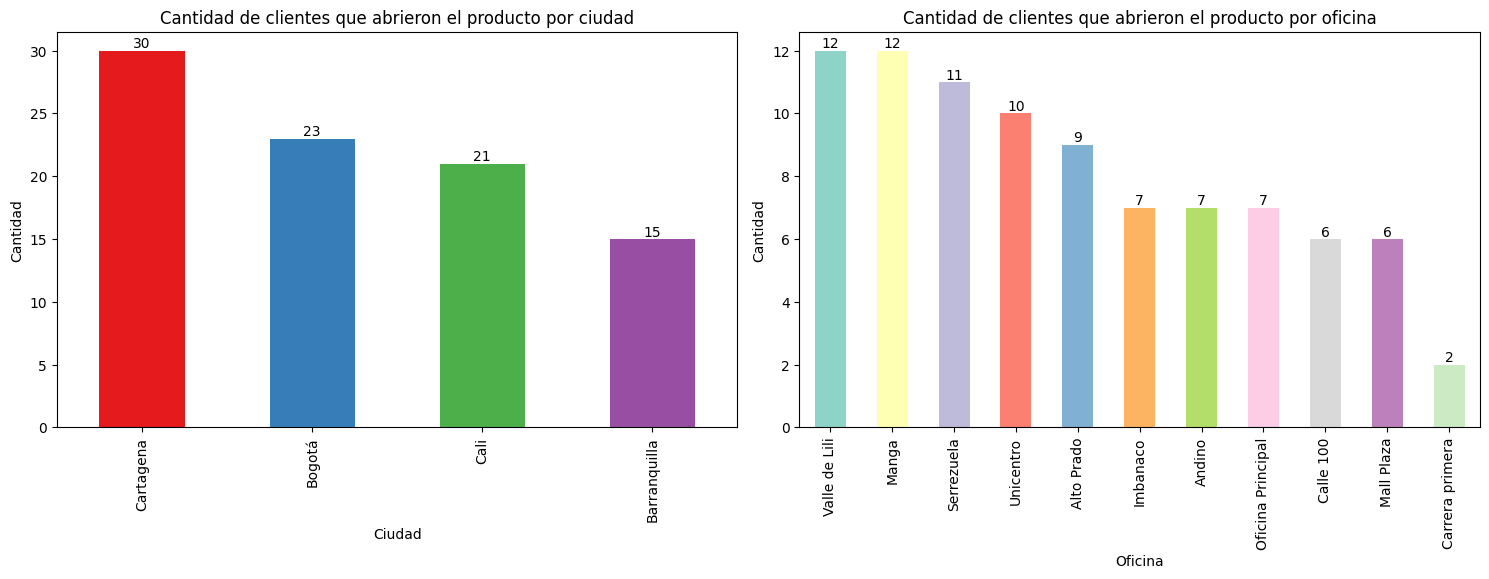

In [149]:
# Definir el tamaño de las gráficas
plt.figure(figsize=(15, 10))

# Gráfico para contar los clientes que abrieron productos por oficina
plt.subplot(2, 2, 4)
oficina_counts = Clientes_contactados[Clientes_contactados['Abre_Producto'] == 1]['Nombre_Oficina'].value_counts()
colors = plt.cm.Set3(np.arange(len(oficina_counts)))
oficina_counts.plot(kind='bar', color=colors)
plt.title('Cantidad de clientes que abrieron el producto por oficina')
plt.xlabel('Oficina')
plt.ylabel('Cantidad')

# Agregar las cantidades en cada barra
for i, v in enumerate(oficina_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Gráfico para contar los clientes que abrieron producto por ciudad
plt.subplot(2, 2, 3)
ciudad_counts = Clientes_contactados[Clientes_contactados['Abre_Producto'] == 1]['Ciudad_x'].value_counts()
colors = plt.cm.Set1(np.arange(len(ciudad_counts)))
ciudad_counts.plot(kind='bar', color=colors)
plt.title('Cantidad de clientes que abrieron el producto por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')

# Agregar las cantidades en cada barra
for i, v in enumerate(ciudad_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

¿Qué tipo de clientes (Ingresos, montos de crédito, profundización, etc.) fueron más afines a la campaña, es decir, abrieron productos?

<ipython-input-150-1079806a6583>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abre_product['saldo_Ahorro'] = pd.to_numeric(df_abre_product['saldo_Ahorro'], errors='coerce')
<ipython-input-150-1079806a6583>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abre_product['Ingresos_Mensuales_Rangos'] = pd.cut(df_abre_product['Ingresos_Mensuales'], bins=5)


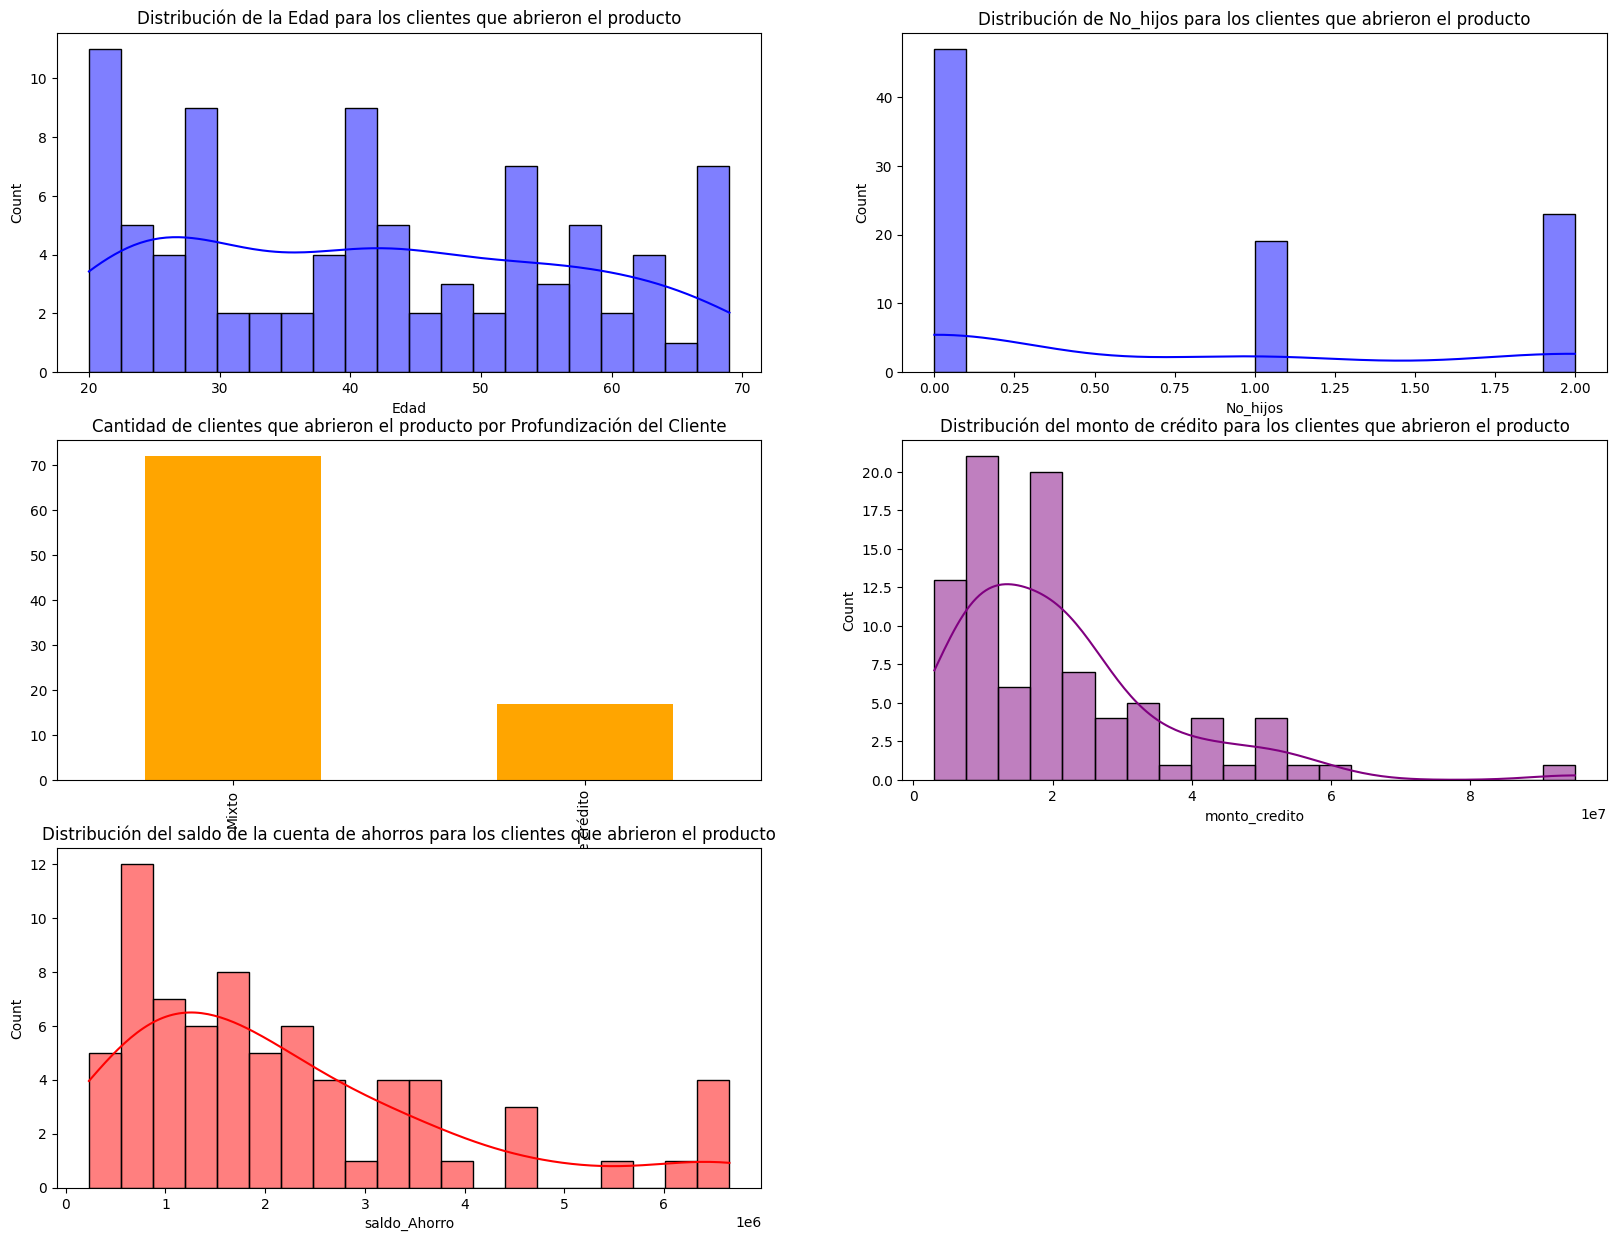

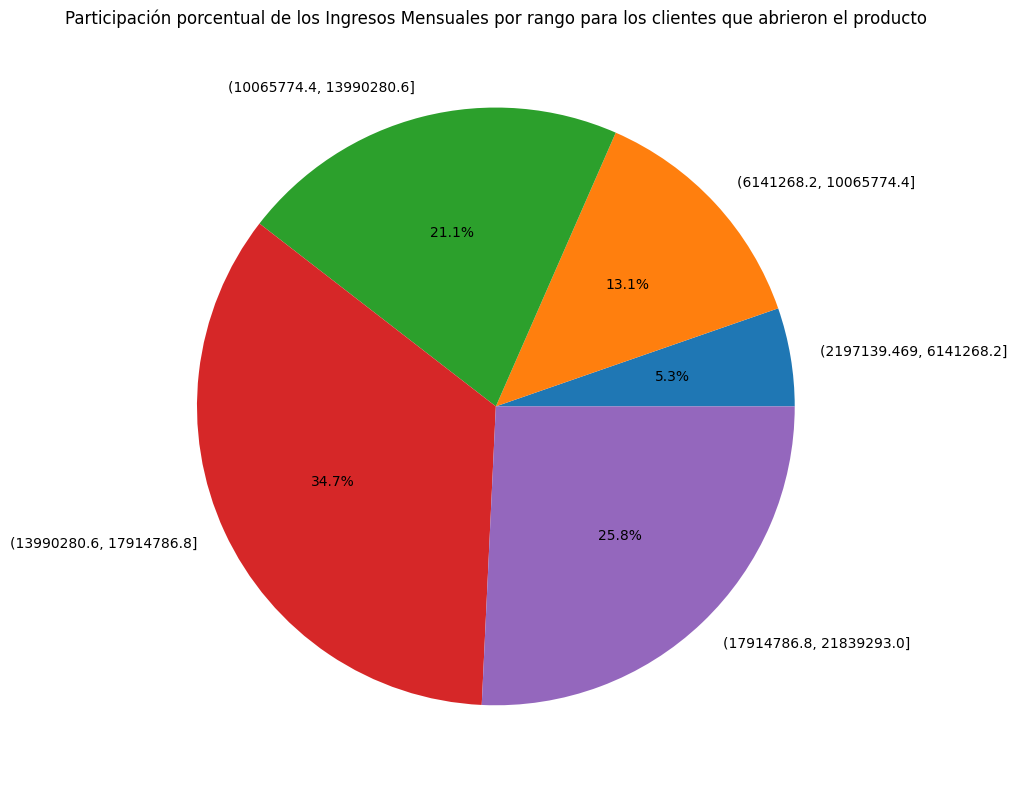

In [150]:
# Filtrar los clientes contactados por aquellos que abrieron producto
df_abre_product = Clientes_contactados[Clientes_contactados['Abre_Producto'] == 1]

# Definir el tamaño del gráfico
plt.figure(figsize=(20, 15))

# Gráfico de distribución de clientes por edad
plt.subplot(3, 2, 1)
sns.histplot(df_abre_product['Edad'], bins=20, color='blue', kde=True)
plt.title('Distribución de la Edad para los clientes que abrieron el producto')

# Gráfico de distribución de clientes por cantidad de hijos
plt.subplot(3, 2, 2)
sns.histplot(df_abre_product['No_hijos'], bins=20, color='blue', kde=True)
plt.title('Distribución de No_hijos para los clientes que abrieron el producto')

# Gráfico de Cantidad de clientes que abrieron el producto por Profundización del Cliente
plt.subplot(3, 2, 3)
df_abre_product['Profundizacion_Cliente'].value_counts().plot(kind='bar', color='orange')
plt.title('Cantidad de clientes que abrieron el producto por Profundización del Cliente')

# Gráfico de la distribución del valor del crédito por cliente
plt.subplot(3, 2, 4)
sns.histplot(df_abre_product['monto_credito'], bins=20, color='purple', kde=True)
plt.title('Distribución del monto de crédito para los clientes que abrieron el producto')
# Convertir el campo 'saldo_Ahorro' a un tipo numérico
df_abre_product['saldo_Ahorro'] = pd.to_numeric(df_abre_product['saldo_Ahorro'], errors='coerce')
# Gráfico de distribución de ahorros por cliente
plt.subplot(3, 2, 5)
sns.histplot(df_abre_product['saldo_Ahorro'], bins=20, color=(1, 0, 0), kde=True)
plt.title('Distribución del saldo de la cuenta de ahorros para los clientes que abrieron el producto')

# Gráfico de distribución del ingreso de los clientes
df_abre_product['Ingresos_Mensuales_Rangos'] = pd.cut(df_abre_product['Ingresos_Mensuales'], bins=5)
ingresos_por_rango = df_abre_product.groupby('Ingresos_Mensuales_Rangos')['Ingresos_Mensuales'].sum()
# Agrupamos por rango y sumamos los ingresos
ingresos_por_rango = df_abre_product.groupby('Ingresos_Mensuales_Rangos')['Ingresos_Mensuales'].sum()

# Creamos un gráfico de torta
plt.figure(figsize=(10,8))
plt.pie(ingresos_por_rango, labels = ingresos_por_rango.index, autopct='%1.1f%%')
plt.title('Participación porcentual de los Ingresos Mensuales por rango para los clientes que abrieron el producto')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

**De acuerdo con la información visualizada en los gráficoas se observa:**

1. Distribución de la edad de los clientes que abrieron el producto es equitativa entre los 20 y 69 años, sin embargo la mayor concentración se presenta en los clientes entre los 20 y los 30 años.
2. Distribución de clientes por cantidad de hijos: la mayorua de los clientes que abrieron el producto no tienen hijos.
3. Distribución del monto del crédito para los clientes que abrieron el producto:la mayoría de los clientes que abrieron el producto tienen montos de crédito entre 0 y aproximadamente 20,000,000.
4. Distribución del saldo de la cuenta de ahorros para los clientes que abrieron el producto: La mayoría de los clientes que abrieron el producto tienen un saldo en su cuenta de ahorros de menos de 3,000,000.
5. Cantidad de clientes que abrieron el producto por Profundización del Cliente: La mayoría de los clientes que abrieron el producto son "Exclusivos de crédito".
6. Distribución del ingreso de los clientes que abrieron producto: El 34,7% de los clientes que abrieron producto tienen ingresos entre 13,990280 y 17,914.786, segudido por un 25,8% con ingresos entre 17,914.786 y 21,839,293. Esto permite concluir que los clientes de mayores ingresos son los más afines a abrir los productos.

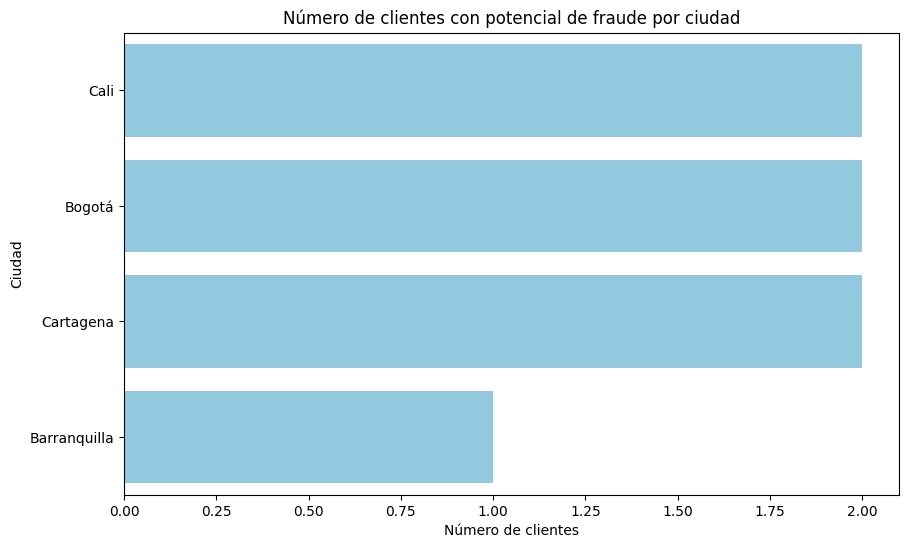

In [151]:
#@title ¿Qué estrategias se pueden aplicar en los clientes que reclamaron el seguro y tienen alta probabilidad de ser un fraude?
# Filtramos los datos para obtener solo los clientes que reclamaron el seguro y tienen alta probabilidad de ser un fraude
df_fraude_potencial = df_abre_product[(df_abre_product['estado siniestro'] != 'No') & (df_abre_product['posible_fraude'] == 'Si')]

# Creamos un gráfico de barras para mostrar el número de clientes con potencial de fraude por ciudad
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fraude_potencial, y='Ciudad_x', order=df_fraude_potencial['Ciudad_x'].value_counts().index, color='skyblue')
plt.title('Número de clientes con potencial de fraude por ciudad')
plt.xlabel('Número de clientes')
plt.ylabel('Ciudad')
plt.show()

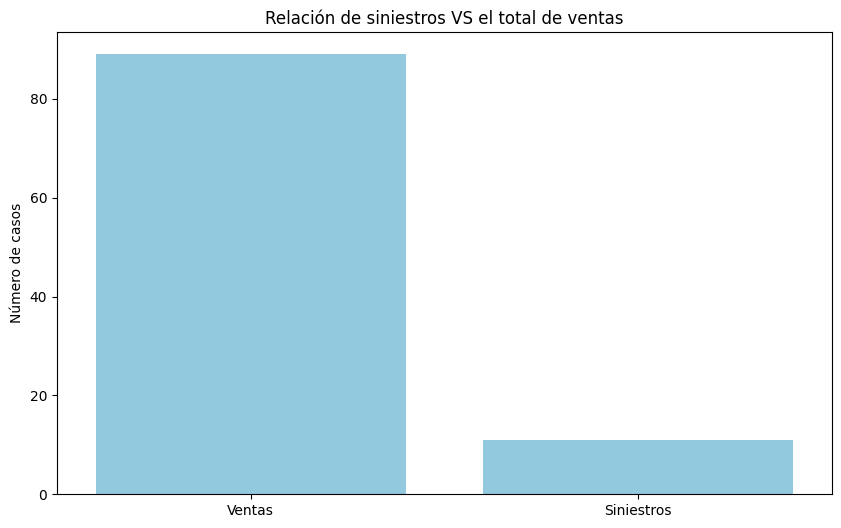

0.12359550561797752

In [152]:
#@title ¿Cómo es la relación de siniestros VS el total de ventas?
# Calculamos el número total de ventas y el número total de siniestros
total_ventas = len(df_abre_product[df_abre_product['Abre_Producto'] == 1])
total_siniestros = len(df_abre_product[df_abre_product['estado siniestro'] != 'No'])

# Calculamos la relación entre los siniestros y las ventas
relacion_siniestros_ventas = total_siniestros / total_ventas

# Creamos un gráfico de barras para mostrar la relación entre los siniestros y las ventas
plt.figure(figsize=(10, 6))
sns.barplot(x=['Ventas', 'Siniestros'], y=[total_ventas, total_siniestros], color='skyblue')
plt.title('Relación de siniestros VS el total de ventas')
plt.ylabel('Número de casos')

plt.show()

relacion_siniestros_ventas

# La relación entre los siniestros y las ventas es de aproximadamente 0.124. Esto significa que por cada venta, hay alrededor de 0.124 siniestros. En otras palabras, alrededor del 12.4% de las ventas resultan en un siniestro.

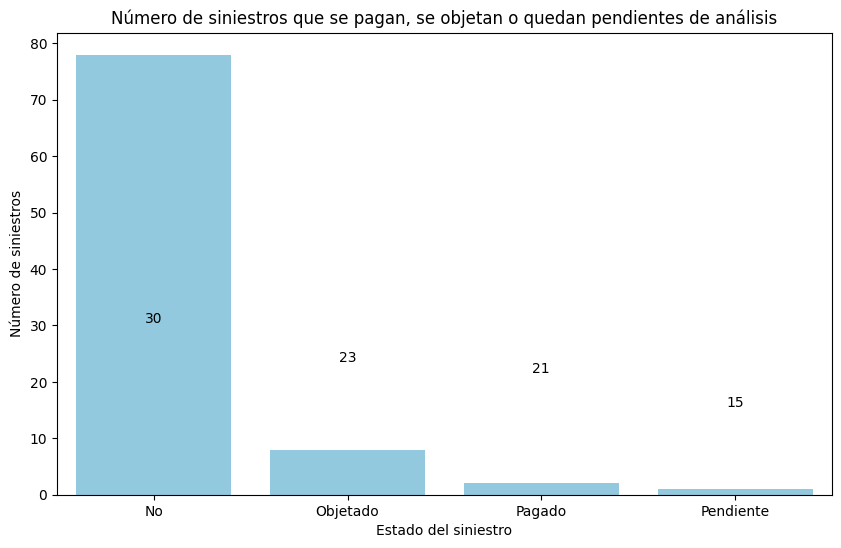

EL VALOR TOTAL PAGADO EN SINIESTROS ES: 195531.0


In [153]:
#@title ¿Cuántos siniestros se pagan, objetan o quedan pendientes de análisis?¿Cuánto es el valor pagado en siniestros?
# Creamos un gráfico de barras para mostrar el número de siniestros que se pagan, se objetan o quedan pendientes de análisis
plt.figure(figsize=(10, 6))
sns.countplot(data=df_abre_product, x='estado siniestro', order=df_abre_product['estado siniestro'].value_counts().index, color='skyblue')
plt.title('Número de siniestros que se pagan, se objetan o quedan pendientes de análisis')
plt.xlabel('Estado del siniestro')
plt.ylabel('Número de siniestros')
# Agregar las cantidades en cada barra
for i, v in enumerate(ciudad_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

# Calculamos el valor total pagado en siniestros
total_pagado_siniestros = df_abre_product[df_abre_product['estado siniestro'] == 'Pagado']['valor_por_pagar'].sum()
print(f"EL VALOR TOTAL PAGADO EN SINIESTROS ES: {total_pagado_siniestros}")

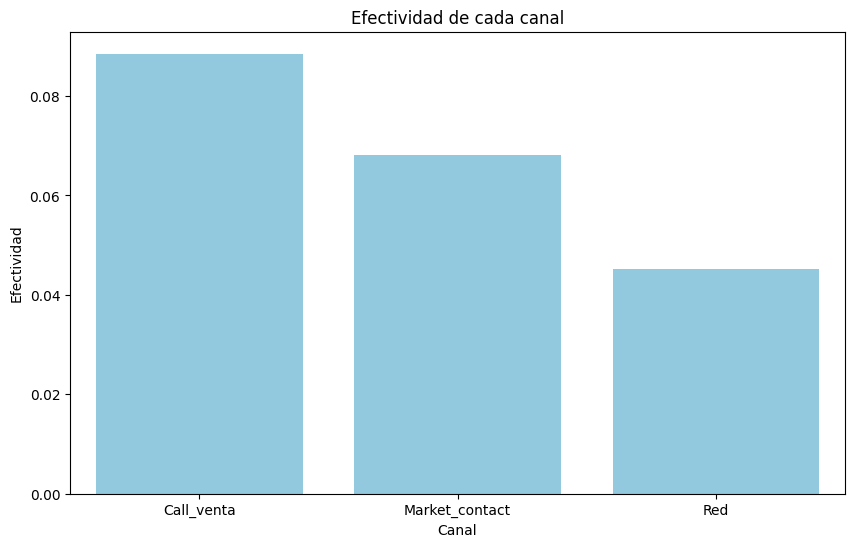

Call_venta        0.088565
Market_contact    0.068051
Red               0.045292
Name: Canal_Gestiono, dtype: float64

In [154]:
#@title **3. Cree un funnel de conversión donde se pueda evidenciar el ranking de canales por efectividad.**
# Calculamos el número de clientes contactados por canal
clientes_contactados = Base_full[Base_full['Contactado_Titular'] == 1]['Canal_Gestiono'].value_counts()

# Calculamos el número de ventas efectivas por canal
ventas_efectivas = Base_full[Base_full['Abre_Producto'] == 1]['Canal_Gestiono'].value_counts()

# Calculamos la efectividad de cada canal
efectividad_canales = ventas_efectivas / clientes_contactados

# Creamos un gráfico de barras para mostrar la efectividad de cada canal
plt.figure(figsize=(10, 6))
sns.barplot(x=efectividad_canales.index, y=efectividad_canales.values, color='skyblue')
plt.title('Efectividad de cada canal')
plt.xlabel('Canal')
plt.ylabel('Efectividad')
plt.show()

efectividad_canales

El canal "Call Venta" fue el más efectivo en términos de convertir a los clientes contactados en ventas efectivas.

In [155]:
# Calculamos el número de clientes gestionados, contactados y que abrieron un producto por canal
clientes_gestionados = Base_full['Canal_Gestiono'].value_counts()
clientes_contactados = Base_full[Base_full['Contactado_Titular'] == 1]['Canal_Gestiono'].value_counts()
clientes_abrieron = Base_full[Base_full['Abre_Producto'] == 1]['Canal_Gestiono'].value_counts()

# Creamos un DataFrame para almacenar esta información
funnel_df = pd.DataFrame({
    'Canal': efectividad_canales.index,
    'Gestionados': clientes_gestionados[efectividad_canales.index],
    'Contactados': clientes_contactados[efectividad_canales.index],
    'Abrieron': clientes_abrieron[efectividad_canales.index]
})

# Calculamos las tasas de conversión en cada etapa del funnel
funnel_df['Tasa Contactados/Gestionados'] = funnel_df['Contactados'] / funnel_df['Gestionados']
funnel_df['Tasa Abrieron/Contactados'] = funnel_df['Abrieron'] / funnel_df['Contactados']

funnel_df

,Canal,Gestionados,Contactados,Abrieron,Tasa Contactados/Gestionados,Tasa Abrieron/Contactados
Call_venta,Call_venta,930,892,79,0.959140,0.088565
Market_contact,Market_contact,908,867,59,0.954846,0.068051
Red,Red,952,839,38,0.881303,0.045292


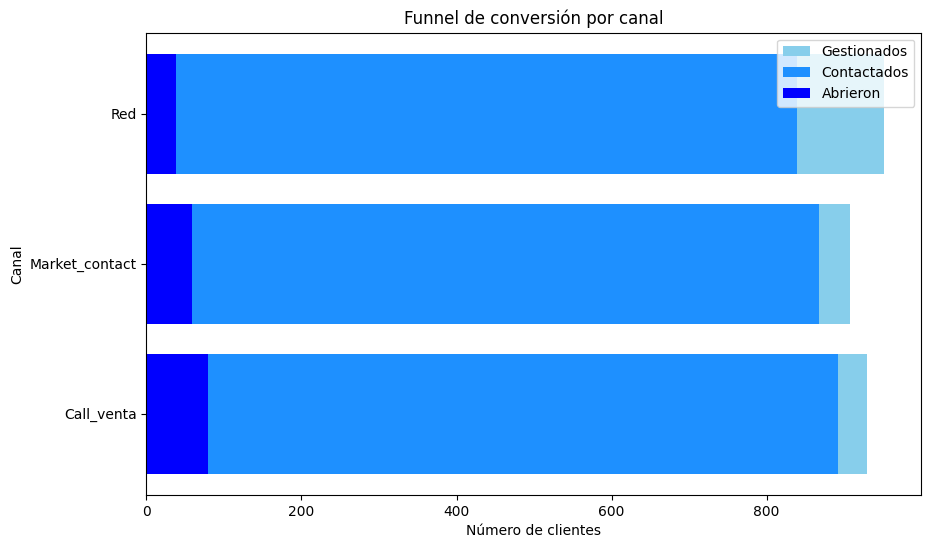

In [156]:
# Creamos el gráfico de embudo
fig, ax = plt.subplots(figsize=(10, 6))

# Añadimos las barras para cada etapa del embudo
ax.barh(funnel_df['Canal'], funnel_df['Gestionados'], color='skyblue', label='Gestionados')
ax.barh(funnel_df['Canal'], funnel_df['Contactados'], color='dodgerblue', label='Contactados')
ax.barh(funnel_df['Canal'], funnel_df['Abrieron'], color='blue', label='Abrieron')

# Añadimos leyendas y títulos
ax.set_xlabel('Número de clientes')
ax.set_ylabel('Canal')
ax.set_title('Funnel de conversión por canal')
ax.legend()

plt.show()

Se observaa que el canal "Call Venta" tuvo la mayor cantidad de clientes gestionados y contactados, así como la mayor cantidad de clientes que abrieron un producto, en concordancia con el cálculo de la efectividad del canal, donde el "Call Venta" también tenía la mayor efectividad.

Por otro lado, el canal "Red de Informadores" tuvo la menor cantidad de clientes en cada etapa del embudo de conversión. Esto indica que este canal fue el menos efectivo en términos de convertir a los clientes gestionados en ventas efectivas.

In [157]:
#@title Calcule la utilidad por canal (Rentabilidad*Persistencia -costos -$siniestros pagados).
#TIP1: Una persona que tenga más de 60 días de mora se considera que es una venta efectiva pero que no va a poder recaudar el pago por lo cual su rentabilidad va a ser de $0
#TIP2: Una persona que tenga en la cuenta un saldo de ahorro inferior a $50.000 se considera que es una venta efectiva pero que no se va a poder recaudar el pago por lo cual su rentabilidad va a ser de $0
#Con base en lo anterior ¿Cuál es el impacto en la utilidad si se pagan todos los siniestros que están Pendientes en Análisis?'''
# Calcular los totales de siniestros pagados y pendientes para cada canal
total_siniestros_pagados_call = Base_full[(Base_full['Canal_Gestiono'] == 'Call Venta') & (Base_full['estado siniestro'] == 'Pagado')]['valor_por_pagar'].sum()
total_siniestros_pagados_market = Base_full[(Base_full['Canal_Gestiono'] == 'Market Contact') & (Base_full['estado siniestro'] == 'Pagado')]['valor_por_pagar'].sum()
total_siniestros_pagados_informadores = Base_full[(Base_full['Canal_Gestiono'] == 'Informadores') & (Base_full['estado siniestro'] == 'Pagado')]['valor_por_pagar'].sum()

total_siniestros_pendientes_call = Base_full[(Base_full['Canal_Gestiono'] == 'Call Venta') & (Base_full['estado siniestro'] == 'Pendiente')]['valor_por_pagar'].sum()
total_siniestros_pendientes_market = Base_full[(Base_full['Canal_Gestiono'] == 'Market Contact') & (Base_full['estado siniestro'] == 'Pendiente')]['valor_por_pagar'].sum()
total_siniestros_pendientes_informadores = Base_full[(Base_full['Canal_Gestiono'] == 'Informadores') & (Base_full['estado siniestro'] == 'Pendiente')]['valor_por_pagar'].sum()

In [158]:
# Definimos las rentabilidades y las persistencias para cada canal
rentabilidad_call = 14000
rentabilidad_market = 18000
rentabilidad_informadores = 20000

persistencia_call = 15
persistencia_market = 18
persistencia_informadores = 11

clientes_contactados_call = len(Base_full[(Base_full['Canal_Gestiono'] == 'Call Venta') & (Base_full['Contactado_Titular'] == 1)])
clientes_contactados_market = len(Base_full[(Base_full['Canal_Gestiono'] == 'Market Contact') & (Base_full['Contactado_Titular'] == 1)])
clientes_contactados_informadores = len(Base_full[(Base_full['Canal_Gestiono'] == 'Informadores') & (Base_full['Contactado_Titular'] == 1)])
#definición de las variables de clientes que abrieron producto
clientes_abre_call = len(Base_full[(Base_full['Canal_Gestiono'] == 'Call Venta') & (Base_full['Abre_Producto'] == 1)])
clientes_abre_market = len(Base_full[(Base_full['Canal_Gestiono'] == 'Market Contact') & (Base_full['Abre_Producto'] == 1)])
clientes_abre_informadores = len(Base_full[(Base_full['Canal_Gestiono'] == 'Informadores') & (Base_full['Abre_Producto'] == 1)])
# Costos para cada canal
costos_call = clientes_contactados_call * 1200 + clientes_abre_call * 35000
costos_market = clientes_contactados_market * 1200 + clientes_abre_market * 39000
costos_informadores = clientes_contactados_informadores * 1200 + clientes_abre_informadores * 45500
# Calculamos el número de clientes que no pueden recaudar el pago
clientes_sin_pago_call = len(df_abre_product[(df_abre_product['Canal_Gestiono'] == 'Call Venta') & ((df_abre_product['Max_dias_mora'] > 60) | (df_abre_product['saldo_Ahorro'] < 50000))])
clientes_sin_pago_market = len(df_abre_product[(df_abre_product['Canal_Gestiono'] == 'Market Contact') & ((df_abre_product['Max_dias_mora'] > 60) | (df_abre_product['saldo_Ahorro'] < 50000))])
clientes_sin_pago_informadores = len(df_abre_product[(df_abre_product['Canal_Gestiono'] == 'Informadores') & ((df_abre_product['Max_dias_mora'] > 60) | (df_abre_product['saldo_Ahorro'] < 50000))])

# Recalculamos la utilidad
utilidad_call = (rentabilidad_call * persistencia_call * (clientes_contactados_call - clientes_sin_pago_call) - costos_call - total_siniestros_pagados_call)
utilidad_market = (rentabilidad_market * persistencia_market * (clientes_contactados_market - clientes_sin_pago_market) - costos_market - total_siniestros_pagados_market)
utilidad_informadores = (rentabilidad_informadores * persistencia_informadores * (clientes_contactados_informadores - clientes_sin_pago_informadores) - costos_informadores - total_siniestros_pagados_informadores)

utilidad = [utilidad_call, utilidad_market, utilidad_informadores]

# Calculamos el impacto en la utilidad si se pagan todos los siniestros que están pendientes de análisis
impacto_utilidad_call = utilidad_call - total_siniestros_pendientes_call
impacto_utilidad_market = utilidad_market - total_siniestros_pendientes_market
impacto_utilidad_informadores = utilidad_informadores - total_siniestros_pendientes_informadores

impacto_utilidad = [impacto_utilidad_call, impacto_utilidad_market, impacto_utilidad_informadores]

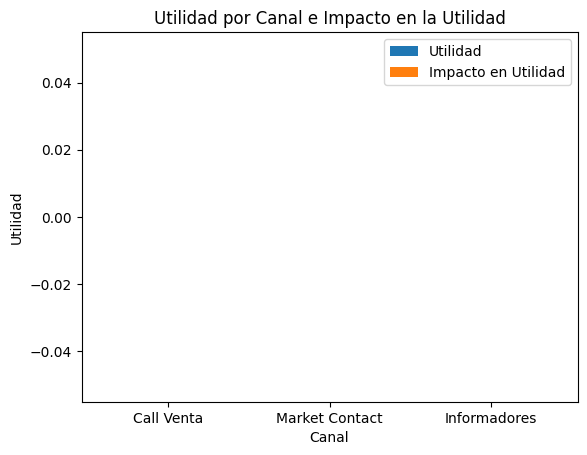

In [159]:
# Definimos la utilidad por canal y el impacto en la utilidad si se pagan todos los siniestros pendientes.
# Estas deben ser listas o arrays de valores previamente calculados.
utilidad = [utilidad_call, utilidad_market, utilidad_informadores]
impacto_utilidad = [impacto_utilidad_call, impacto_utilidad_market, impacto_utilidad_informadores]

# Definimos los canales
canales = ['Call Venta', 'Market Contact', 'Informadores']

# Creamos un gráfico de barras para la utilidad por canal
plt.bar(canales, utilidad, label='Utilidad')

# Creamos un gráfico de barras para el impacto en la utilidad
plt.bar(canales, impacto_utilidad, bottom=utilidad, label='Impacto en Utilidad')

# Agregamos una leyenda
plt.legend()

# Agregamos etiquetas a los ejes y un título al gráfico
plt.xlabel('Canal')
plt.ylabel('Utilidad')
plt.title('Utilidad por Canal e Impacto en la Utilidad')

# Mostramos el gráfico
plt.show()

In [160]:
# Convertimos los valores de 'valor_por_pagar' a números, forzando los errores a NaN
df_abre_product['valor_por_pagar'] = pd.to_numeric(df_abre_product['valor_por_pagar'], errors='coerce')

# Calculamos el valor total de los siniestros pendientes de análisis
siniestros_pendientes_analisis = df_abre_product[(df_abre_product['estado siniestro'] != 'Pagado') & (df_abre_product['estado siniestro'] != 'Objetado')]['valor_por_pagar'].sum()

# Calculamos el impacto en la utilidad si se pagan todos los siniestros que están pendientes de análisis
impacto_utilidad_pagar_siniestros_pendientes = -siniestros_pendientes_analisis

impacto_utilidad_pagar_siniestros_pendientes

<ipython-input-160-85b6715d0a21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abre_product['valor_por_pagar'] = pd.to_numeric(df_abre_product['valor_por_pagar'], errors='coerce')


-116634.0

Con base en lo anterior no hay impacto en la utilidad debido a que los pendientes cuetnan con mora

In [161]:
# Exportamos los DataFrames 'Base_full' y 'df_abre_product' a archivos Excel
# Creamos un escritor de Excel usando Pandas
writer =pd.ExcelWriter ('Bases_bancaseguros.xlsx')
# Escribimos cada DataFrame a una hoja diferente
Base_full.to_excel(writer, sheet_name='df_final', index=False)
df_abre_product.to_excel(writer, sheet_name='df_abre_producto', index=False)
writer.save()
writer.close()

<ipython-input-161-3267a7d1fdf0>:7: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


**5. Pensando en lanzar una nueva campaña en Agosto, ¿Cuales son sus conclusiones de la campaña de febrero y qué recomendaciones le haría a El Banco y a La Aseguradora para poder tener una campaña con mejores indicadores en ventas y en siniestros?**
